In [1]:
# Surpress all warnings
import warnings
warnings.filterwarnings("ignore")

# Import all necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from pandas.plotting import scatter_matrix

# Set precision
pd.set_option('display.precision', 14)

# Read raw training data for element Co and convert them into DataFrame
raw_data = pd.read_excel('data/Co_temperature.xlsx')
# raw_data = pd.read_excel('data/data with updated BSCF.xlsx')
raw_data.drop(raw_data.columns[0], axis=1,inplace=True)
raw_data.dropna(axis='rows', inplace=True)

print("Shape of the dataset: " + str(raw_data.shape))
raw_data.info()
raw_data.head(n=5)  # show the first 5 rows of the dataset

Shape of the dataset: (2895, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 2895 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Samples            2895 non-null   object 
 1   Oxygen vacancy     2895 non-null   float64
 2   Polarization       2895 non-null   float64
 3   Charge             2895 non-null   float64
 4   Electronegativity  2895 non-null   float64
 5   Radius A-site      2895 non-null   float64
 6   Radius B-site      2895 non-null   float64
 7   Tolerance factor   2895 non-null   float64
 8   Temperature        2895 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 226.2+ KB


,Samples,Oxygen vacancy,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
0,Pr1Ba0.5Sr0.5Co2O5+x,0.09582815321631,5.13235634999658,2.50000000000000,1.18000000000000,1.352,0.610,0.97616997689958,25
1,La0.6Sr0.4Co1O3-δ,0.10569000000000,5.08169934640523,2.60000000000000,1.19200000000000,1.392,0.610,0.99067473138546,25
2,La0.6Sr0.4Co0.8Fe0.2O3-δ,0.03936203966423,9.02471669115536,2.77777777777778,1.46222222222222,1.392,0.617,0.98713118354709,25
3,Sr1V0.2Co0.8O3-δ,0.24062802474102,10.03086419753086,2.50000000000000,1.19666666666667,1.440,0.596,1.01537027463771,25
4,Sr1Nb0.2Co0.8O3-δ,0.23489581479327,8.82523148148148,2.50000000000000,1.17000000000000,1.440,0.616,1.00498816549008,25


In [2]:
raw_data.describe()

,Oxygen vacancy,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
count,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000,2895.00000000000000
mean,0.25374497011683,7.96945326090710,2.62581894972079,1.24828639732649,1.40878574285915,0.62058314223614,0.99145686208105,491.14853195164073
std,0.14855562838597,5.13948052323340,0.35940128546514,0.13197701780728,0.06894585859586,0.02381051198844,0.02500012220108,210.92017615391325
min,-0.00229500000000,2.72371750632620,2.00000000000000,0.96478260869565,1.24020000000000,0.59600000000000,0.92689034414490,25.00000000000000
25%,0.14858250000000,4.99301561365949,2.50000000000000,1.14000000000000,1.37600000000000,0.61000000000000,0.97616997689958,350.00000000000000
50%,0.23966500000000,5.69126378286684,2.50000000000000,1.19600000000000,1.39750000000000,0.61082191780822,0.99158127854083,500.00000000000000
75%,0.34171764200086,8.92058622914923,2.71428571428571,1.35714285714286,1.44000000000000,0.61875000000000,1.00473133232742,650.00000000000000
max,0.98181800000000,32.82656162883060,4.23677581863980,1.69536585365854,1.61000000000000,0.74500000000000,1.06426785943894,800.00000000000000


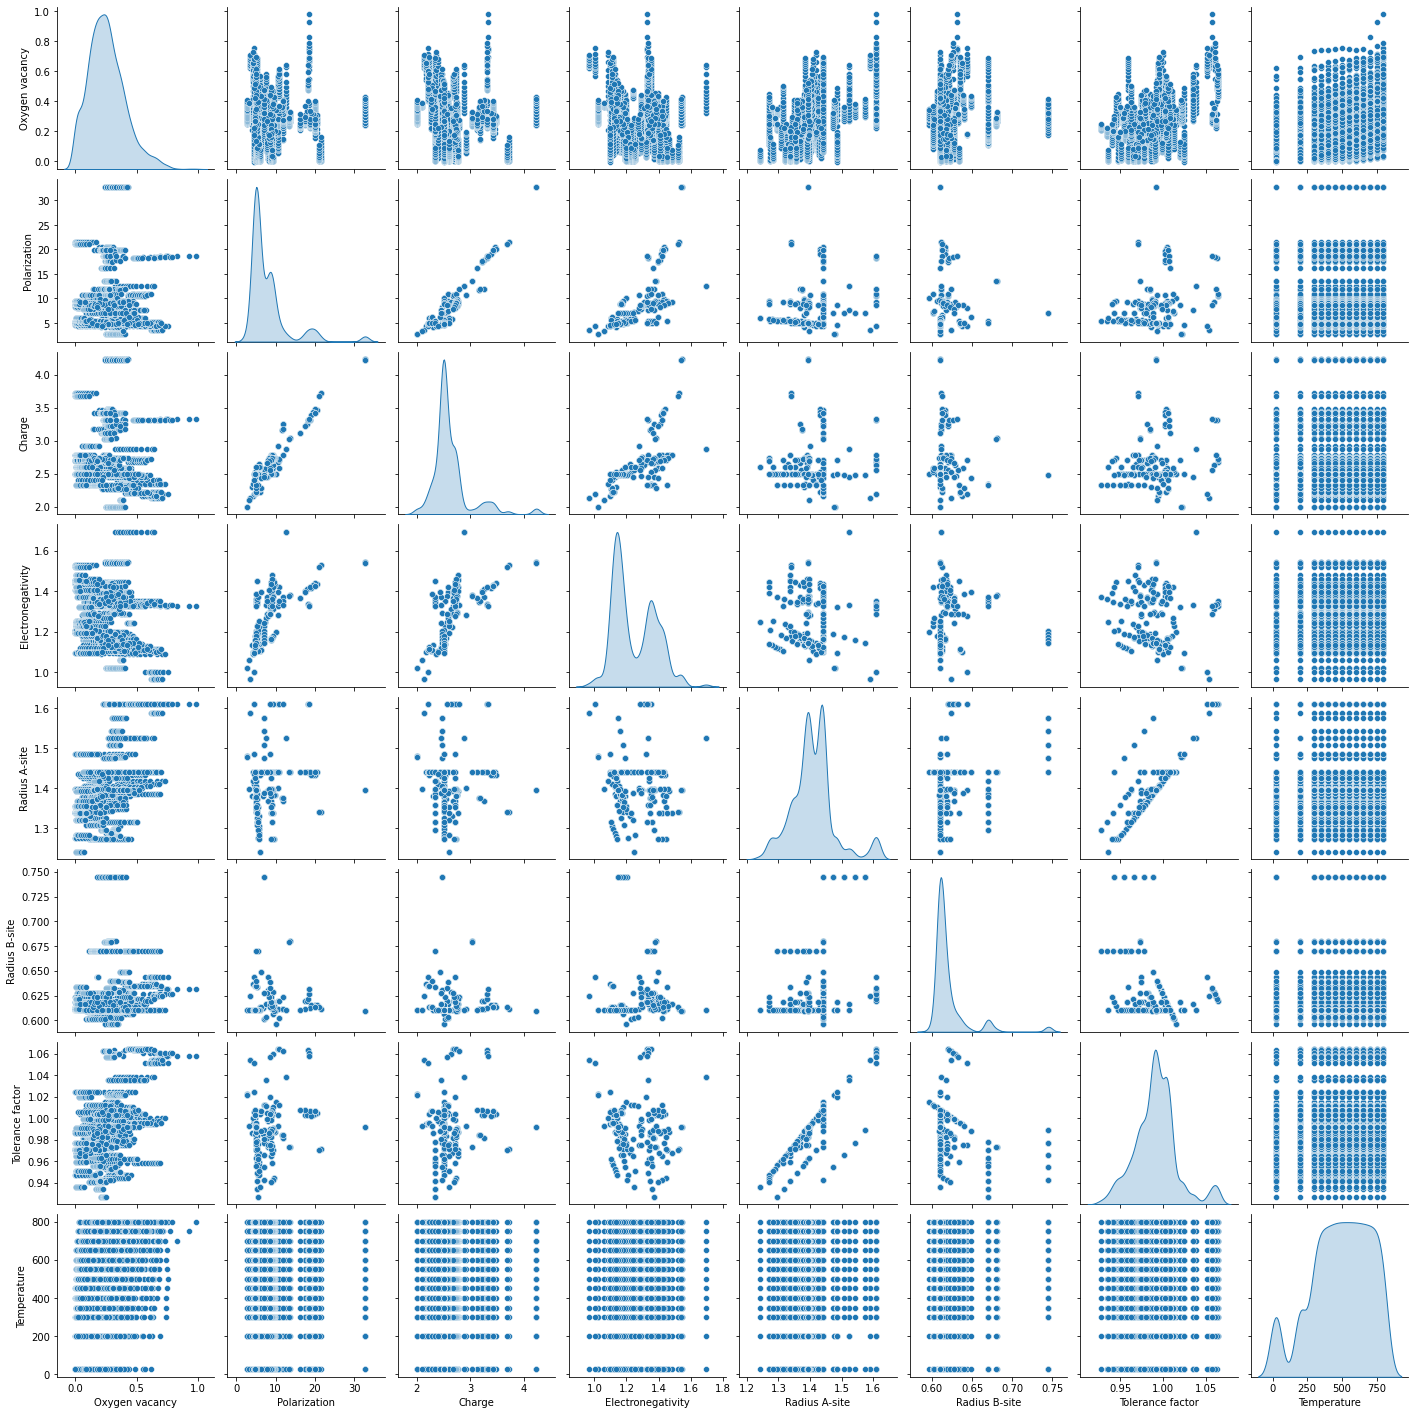

In [3]:
sns.pairplot(raw_data, diag_kind="kde")

In [4]:
# take "Oxygen vacancy" as our label, and everything else as features
LABEL = "Oxygen vacancy"

Y = raw_data.loc[:, LABEL].values
X = raw_data.iloc[:, 2:]

random_state = 1
X, y = shuffle(X, Y, random_state=random_state)
X.head()

,Polarization,Charge,Electronegativity,Radius A-site,Radius B-site,Tolerance factor,Temperature
2417,10.88061039101431,2.58974358974359,1.42051282051282,1.4400,0.602000,1.01223318831030,700
1543,5.01792114695341,2.50000000000000,1.20500000000000,1.3400,0.610000,0.97181855055382,500
1600,5.08241496339231,2.22727272727273,1.11590909090909,1.4400,0.634375,0.99563499927754,500
238,4.87126828290924,2.50000000000000,1.13500000000000,1.4250,0.610000,1.00264115383631,25
2824,9.39222762639121,2.74358974358974,1.37641025641026,1.3945,0.611750,0.99069219580101,750


In [5]:
# Split our dataset into training and testing (4:1 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Initialize a simple gradient boosting regressor
reg = LGBMRegressor(n_estimators=100, random_state=random_state, verbose=-1)
reg.fit(X_train, y_train)
print(f"Test R2 score: {reg.score(X_test, y_test):f}")
predictions = reg.predict(X_test)

# save the model to disk
filename = 'regressor.sav'
pickle.dump(reg, open(filename, 'wb'))

Test R2 score: 0.902100


In [6]:
import shap
# shapely featrue analysis. refererence: https://shap.readthedocs.io/en/latest/index.html
shap_values = shap.TreeExplainer(reg).shap_values(X_test)

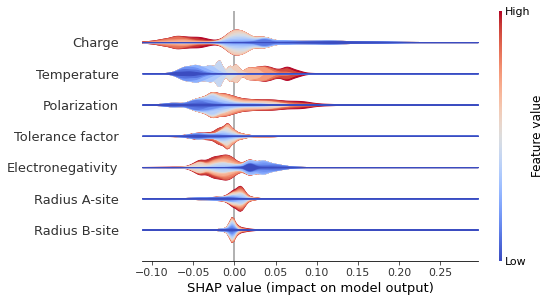

In [7]:
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="layered_violin",
    color="coolwarm",
) #red represents large values of a variable, and blue represents small ones.

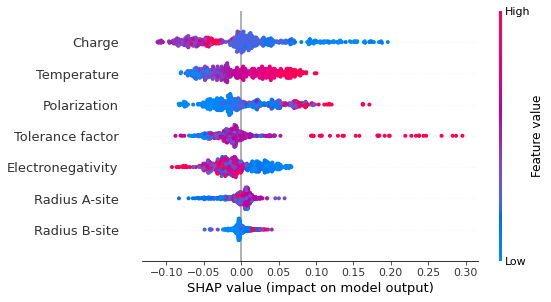

In [8]:
shap.summary_plot(shap_values, X_test)

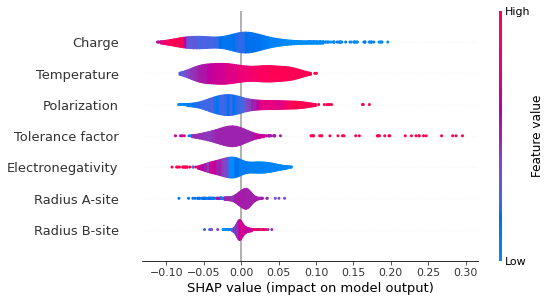

In [9]:
shap.summary_plot(shap_values, X_test, plot_type="violin")

In [10]:
# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

# Initialize a gradient boost regressor
reg = LGBMRegressor(n_estimators=100, random_state=random_state, verbose=-1, njobs=-1)

# Initialize DataFrame to store the results
df_preds = pd.DataFrame()
df_gt = pd.DataFrame()

kf = KFold(n_splits=5, random_state=random_state, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)

    print('5-fold eval: R2 {} | MSE {}'.format(r2_score(y_test, predictions), mean_squared_error(y_test, predictions)))

    df_preds = pd.concat([df_preds, pd.DataFrame(predictions)], ignore_index=True)
    df_gt = pd.concat([df_gt, pd.DataFrame(y_test)], ignore_index=True)

# Save the results to Excel
with pd.ExcelWriter('Co_LGBMRegressor_5fold_preds_gt.xlsx') as writer:
    df_preds.to_excel(writer, sheet_name='Prediction')
    df_gt.to_excel(writer, sheet_name='Ground_truth')

5-fold eval: R2 0.9020997440698467 | MSE 0.002016553430312106
5-fold eval: R2 0.9386357625622811 | MSE 0.0013613140899144944
5-fold eval: R2 0.9086666827265474 | MSE 0.0021203417075768938
5-fold eval: R2 0.9018085798194281 | MSE 0.0021040669240713307
5-fold eval: R2 0.9066798600228934 | MSE 0.0021237102942244087


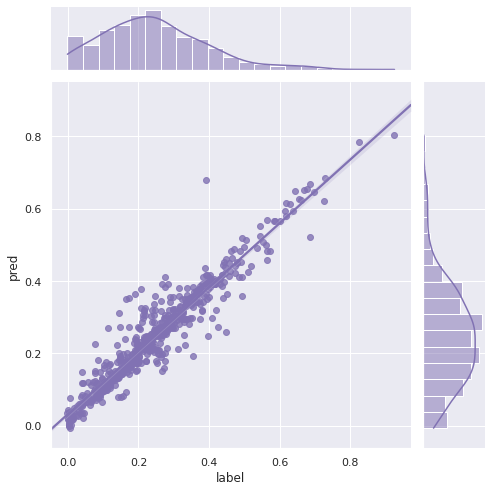

In [11]:
vis_data = pd.DataFrame.from_records({'pred': predictions, 'label': y_test})
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="label", y="pred", data=vis_data,
                  kind="reg", truncate=False,
                  color="m", height=7)

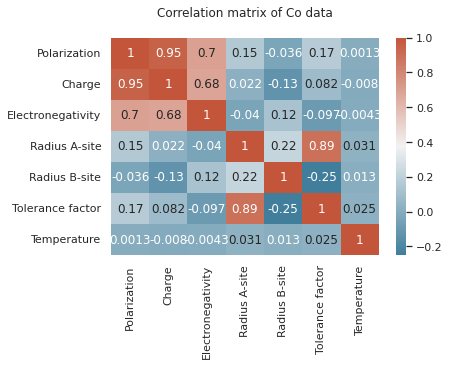

In [12]:
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
hm = sns.heatmap(X.corr(), cmap=cmap, annot = True)
hm.set(title = "Correlation matrix of Co data\n")

plt.show()

In [13]:
import lazypredict.Supervised

current_regressors = lazypredict.Supervised.REGRESSORS
filtered_regressors = [reg for reg in current_regressors if reg[0] != 'QuantileRegressor']
lazypredict.Supervised.REGRESSORS = filtered_regressors

# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

# Initialize a lazy regressor
reg = lazypredict.Supervised.LazyRegressor(predictions=True, ignore_warnings=False, verbose=True)
models, prediction = reg.fit(X_train, X_test, y_train, y_test)

 15%|█▍        | 6/41 [00:00<00:01, 30.69it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5811068842969105, 'Adjusted R-Squared': 0.5759715921604454, 'RMSE': 0.09763635478434096, 'Time taken': 0.11151790618896484}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8963550320728008, 'Adjusted R-Squared': 0.8950844282628351, 'RMSE': 0.04856619240475966, 'Time taken': 0.05441451072692871}
{'Model': 'BayesianRidge', 'R-Squared': 0.5141698511440493, 'Adjusted R-Squared': 0.5082139649058853, 'RMSE': 0.10514828082148697, 'Time taken': 0.00653386116027832}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.884013016703709, 'Adjusted R-Squared': 0.8825911097280977, 'RMSE': 0.051376506743880085, 'Time taken': 0.013006925582885742}
{'Model': 'DummyRegressor', 'R-Squared': -0.002780298712065532, 'Adjusted R-Squared': -0.015073577330251942, 'RMSE': 0.15106464755806723, 'Time taken': 0.005948066711425781}
{'Model': 'ElasticNet', 'R-Squared': -0.002780298712065532, 'Adjusted R-Squared': -0.015073577330251942, 'RMSE': 0.15106464755806723, 'Time taken'

 24%|██▍       | 10/41 [00:00<00:02, 13.84it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8876522573311574, 'Adjusted R-Squared': 0.8862749645138511, 'RMSE': 0.05056408127738391, 'Time taken': 0.27761006355285645}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
{'Model': 'GaussianProcessRegressor', 'R-Squared': -73.80359562108642, 'Adjusted R-Squared': -74.72062744130989, 'RMSE': 1.304731603926148, 'Time taken': 0.3612098693847656}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8559506928557037, 'Adjusted R-Squared': 0.8541847643968419, 'RMSE': 0.05725527859154767, 'Time taken': 0.16694951057434082}


 39%|███▉      | 16/41 [00:01<00:02,  9.15it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9079027823834184, 'Adjusted R-Squared': 0.9067737446893447, 'RMSE': 0.04578078130914223, 'Time taken': 0.24283599853515625}
{'Model': 'HuberRegressor', 'R-Squared': 0.5184619213473901, 'Adjusted R-Squared': 0.5125586524322092, 'RMSE': 0.1046827837817733, 'Time taken': 0.027108192443847656}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7798088681583611, 'Adjusted R-Squared': 0.777109502268884, 'RMSE': 0.07078803505007443, 'Time taken': 0.011801004409790039}
{'Model': 'KernelRidge', 'R-Squared': -2.2747181724614576, 'Adjusted R-Squared': -2.3148635791291112, 'RMSE': 0.2729901079434178, 'Time taken': 0.12221384048461914}
{'Model': 'Lars', 'R-Squared': 0.5153057533528764, 'Adjusted R-Squared': 0.5093637923607051, 'RMSE': 0.10502528715797436, 'Time taken': 0.008292913436889648}


 49%|████▉     | 20/41 [00:01<00:01, 11.83it/s]

{'Model': 'LarsCV', 'R-Squared': 0.5153057533528764, 'Adjusted R-Squared': 0.5093637923607051, 'RMSE': 0.10502528715797436, 'Time taken': 0.0323948860168457}
{'Model': 'Lasso', 'R-Squared': -0.002780298712065532, 'Adjusted R-Squared': -0.015073577330251942, 'RMSE': 0.15106464755806723, 'Time taken': 0.014299631118774414}
{'Model': 'LassoCV', 'R-Squared': 0.48475868458350246, 'Adjusted R-Squared': 0.47844224113706557, 'RMSE': 0.10828424816062963, 'Time taken': 0.12536215782165527}
{'Model': 'LassoLars', 'R-Squared': -0.002780298712065532, 'Adjusted R-Squared': -0.015073577330251942, 'RMSE': 0.15106464755806723, 'Time taken': 0.00674128532409668}
{'Model': 'LassoLarsCV', 'R-Squared': 0.5153057533528741, 'Adjusted R-Squared': 0.5093637923607026, 'RMSE': 0.1050252871579746, 'Time taken': 0.025679588317871094}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5153057533528741, 'Adjusted R-Squared': 0.5093637923607026, 'RMSE': 0.1050252871579746, 'Time taken': 0.008517742156982422}
{'Model': 'LinearRe

 61%|██████    | 25/41 [00:01<00:00, 16.94it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.4946870176058179, 'Adjusted R-Squared': 0.4884922875239278, 'RMSE': 0.10723589317819471, 'Time taken': 0.06275749206542969}
{'Model': 'MLPRegressor', 'R-Squared': 0.6716184286511089, 'Adjusted R-Squared': 0.6675927351319456, 'RMSE': 0.0864468820160828, 'Time taken': 0.27457118034362793}


 68%|██████▊   | 28/41 [00:02<00:01, 10.55it/s]

{'Model': 'NuSVR', 'R-Squared': 0.8132823988818042, 'Adjusted R-Squared': 0.8109933915125794, 'RMSE': 0.06518573621548066, 'Time taken': 0.31006598472595215}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.15456529978330358, 'Adjusted R-Squared': 0.14420095144439493, 'RMSE': 0.13870751137605924, 'Time taken': 0.005361080169677734}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4850149543850606, 'Adjusted R-Squared': 0.4787016525999388, 'RMSE': 0.10825731569871795, 'Time taken': 0.019199609756469727}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.14181553478017406, 'Adjusted R-Squared': 0.1312948845935913, 'RMSE': 0.13974950223653942, 'Time taken': 0.008380889892578125}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.
{'Model': 'RANSACRegressor', 'R-Squared': -0.10366105664495562, 'Adjusted R-Squared': -0.11719105208543668, 'RMSE': 0.158481219558308, 'Time taken': 0.06617212295532227}


 90%|█████████ | 37/41 [00:03<00:00, 12.57it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9040406777215568, 'Adjusted R-Squared': 0.9028642937356565, 'RMSE': 0.04673083394170607, 'Time taken': 0.4735889434814453}
{'Model': 'Ridge', 'R-Squared': 0.48777258695958214, 'Adjusted R-Squared': 0.4814930915282636, 'RMSE': 0.1079670794847473, 'Time taken': 0.005970001220703125}
{'Model': 'RidgeCV', 'R-Squared': 0.5037200626523146, 'Adjusted R-Squared': 0.4976360704256355, 'RMSE': 0.10627308911099595, 'Time taken': 0.006272077560424805}
{'Model': 'SGDRegressor', 'R-Squared': 0.43418798155994864, 'Adjusted R-Squared': 0.42725158203441393, 'RMSE': 0.11347391252193867, 'Time taken': 0.008331775665283203}
{'Model': 'SVR', 'R-Squared': 0.7474882599323389, 'Adjusted R-Squared': 0.7443926694236285, 'RMSE': 0.07580550279753269, 'Time taken': 0.08777165412902832}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.515305753352716, 'Adjusted R-Squared': 0.5093637923605426, 'RMSE': 0.10502528715799174, 'Time taken': 0.0059659481048583984}
{'M

100%|██████████| 41/41 [00:11<00:00,  3.50it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9093953146014546, 'Adjusted R-Squared': 0.9082845741499839, 'RMSE': 0.0454083032037129, 'Time taken': 8.142312049865723}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9080293372773932, 'Adjusted R-Squared': 0.9069018510443665, 'RMSE': 0.04574931578924439, 'Time taken': 0.08295726776123047}


([<matplotlib.axis.XTick at 0x7f279d53a340>,
 [Text(0, 0, 'XGBRegressor'),
  Text(1, 0, 'LGBMRegressor'),
  Text(2, 0, 'HistGradientBoostingRegressor'),
  Text(3, 0, 'RandomForestRegressor'),
  Text(4, 0, 'BaggingRegressor'),
  Text(5, 0, 'ExtraTreesRegressor'),
  Text(6, 0, 'DecisionTreeRegressor'),
  Text(7, 0, 'ExtraTreeRegressor'),
  Text(8, 0, 'GradientBoostingRegressor'),
  Text(9, 0, 'NuSVR'),
  Text(10, 0, 'KNeighborsRegressor'),
  Text(11, 0, 'SVR'),
  Text(12, 0, 'MLPRegressor'),
  Text(13, 0, 'AdaBoostRegressor'),
  Text(14, 0, 'HuberRegressor'),
  Text(15, 0, 'Lars'),
  Text(16, 0, 'LarsCV'),
  Text(17, 0, 'LassoLarsCV'),
  Text(18, 0, 'LassoLarsIC'),
  Text(19, 0, 'TransformedTargetRegressor'),
  Text(20, 0, 'LinearRegression'),
  Text(21, 0, 'BayesianRidge'),
  Text(22, 0, 'RidgeCV'),
  Text(23, 0, 'LinearSVR'),
  Text(24, 0, 'Ridge'),
  Text(25, 0, 'OrthogonalMatchingPursuitCV'),
  Text(26, 0, 'LassoCV'),
  Text(27, 0, 'ElasticNetCV'),
  Text(28, 0, 'SGDRegressor'),
  Te

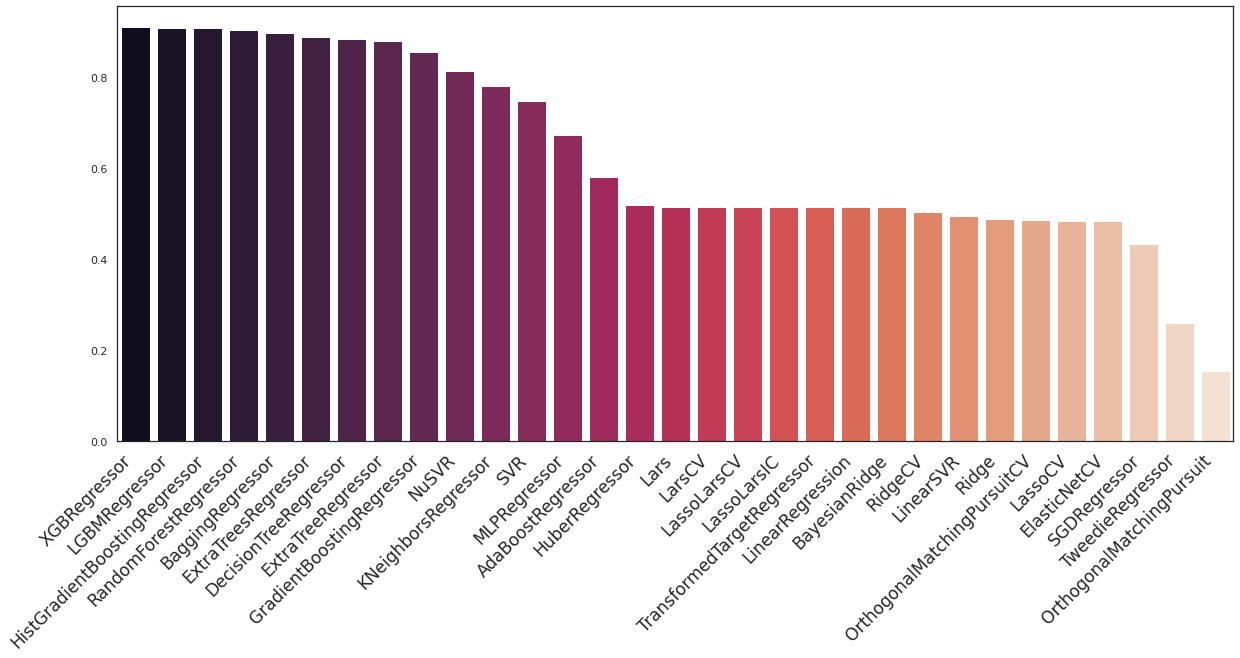

In [14]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(range(31)), y=list(models['R-Squared'])[:31], palette="rocket")
plt.xticks(list(range(31)), list(models['R-Squared'].index)[:31], rotation=45, fontsize='17', horizontalalignment='right')

([<matplotlib.axis.XTick at 0x7f2773a79670>,
 [Text(0, 0, 'XGBRegressor'),
  Text(1, 0, 'LGBMRegressor'),
  Text(2, 0, 'HistGradientBoostingRegressor'),
  Text(3, 0, 'RandomForestRegressor'),
  Text(4, 0, 'BaggingRegressor'),
  Text(5, 0, 'ExtraTreesRegressor'),
  Text(6, 0, 'DecisionTreeRegressor'),
  Text(7, 0, 'ExtraTreeRegressor'),
  Text(8, 0, 'GradientBoostingRegressor'),
  Text(9, 0, 'NuSVR'),
  Text(10, 0, 'KNeighborsRegressor'),
  Text(11, 0, 'SVR'),
  Text(12, 0, 'MLPRegressor'),
  Text(13, 0, 'AdaBoostRegressor'),
  Text(14, 0, 'HuberRegressor'),
  Text(15, 0, 'Lars'),
  Text(16, 0, 'LarsCV'),
  Text(17, 0, 'LassoLarsCV'),
  Text(18, 0, 'LassoLarsIC'),
  Text(19, 0, 'TransformedTargetRegressor'),
  Text(20, 0, 'LinearRegression'),
  Text(21, 0, 'BayesianRidge'),
  Text(22, 0, 'RidgeCV'),
  Text(23, 0, 'LinearSVR'),
  Text(24, 0, 'Ridge'),
  Text(25, 0, 'OrthogonalMatchingPursuitCV'),
  Text(26, 0, 'LassoCV'),
  Text(27, 0, 'ElasticNetCV'),
  Text(28, 0, 'SGDRegressor'),
  Te

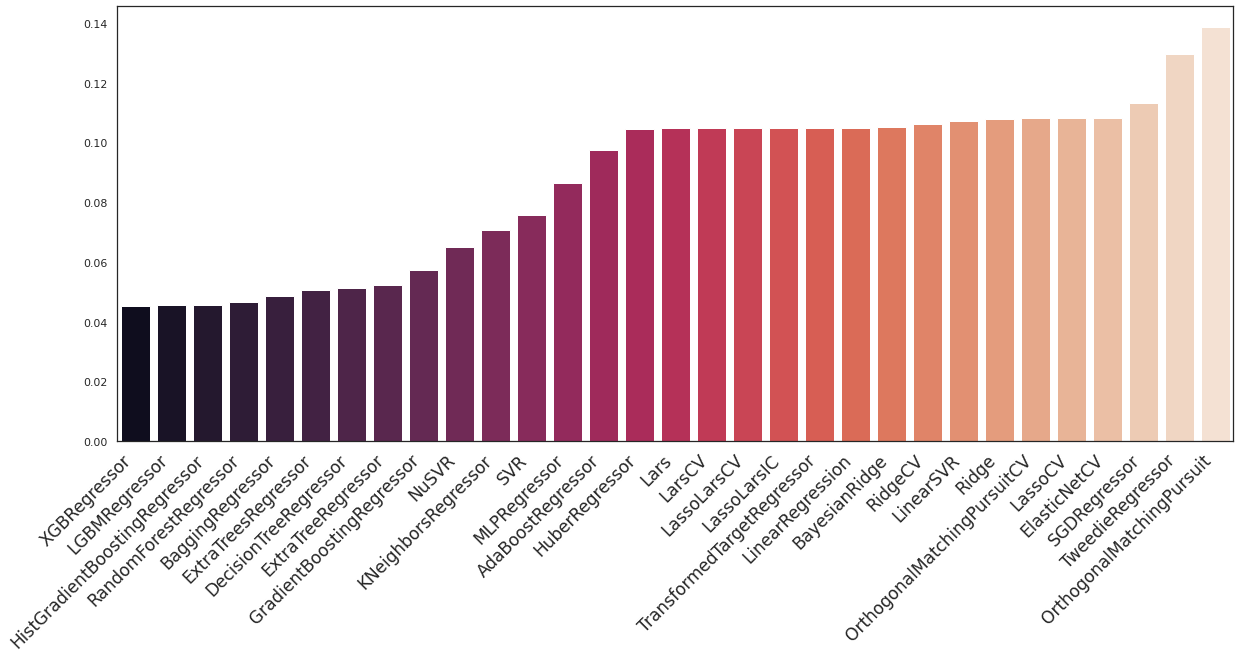

In [15]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(range(31)), y=list(models['RMSE'])[:31], palette="rocket")
plt.xticks(list(range(31)), list(models['RMSE'].index)[:31], rotation=45, fontsize='17', horizontalalignment='right')